<div style="text-align: right">Nov 30<sup>th</sup> 2021</div>

# Programming Tutorial, Day 2
Part of the *Better With Scattering* Workshop by www.bam.de
## Calculating and plotting a scattering model

In [1]:
import numpy
theta = numpy.array([17, 41, 43, 56, 67, 73, 75, 78, 82, 112, 112, 122, 141, 164, 171, 173])
q = scattering_vector_q(theta)
print("angles:\n", theta)
print("scattering vector:\n", q)

NameError: name 'scattering_vector_q' is not defined

## A linear range of angles

Use numpy to generate an array of 500 angles between 0.01 and 5 degrees.  
Helpful links (with examples at the end):  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html  
*Hint checking the result: The size of an array (number of values) is provided by its **.shape** attribute. It contains how many values are store in each dimension.*

In [2]:
import numpy
theta = numpy.arange(1e-2, 180, 180/501)
numpy.set_printoptions(threshold=100, edgeitems=10) # default
theta#, theta.shape

array([1.00000000e-02, 3.69281437e-01, 7.28562874e-01, 1.08784431e+00,
       1.44712575e+00, 1.80640719e+00, 2.16568862e+00, 2.52497006e+00,
       2.88425150e+00, 3.24353293e+00, ..., 1.76417186e+02,
       1.76776467e+02, 1.77135749e+02, 1.77495030e+02, 1.77854311e+02,
       1.78213593e+02, 1.78572874e+02, 1.78932156e+02, 1.79291437e+02,
       1.79650719e+02])

In [3]:
theta = numpy.linspace(1e-2, 180, 500)
theta#, theta.shape

array([1.00000000e-02, 3.70701403e-01, 7.31402806e-01, 1.09210421e+00,
       1.45280561e+00, 1.81350701e+00, 2.17420842e+00, 2.53490982e+00,
       2.89561122e+00, 3.25631263e+00, ..., 1.76753687e+02,
       1.77114389e+02, 1.77475090e+02, 1.77835792e+02, 1.78196493e+02,
       1.78557194e+02, 1.78917896e+02, 1.79278597e+02, 1.79639299e+02,
       1.80000000e+02])

## A logarithmic range of angles

Try also logarithmic spacing. Works best with logarithmic axes in plotting later:  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html  
*Corrects arguments can be tricky. They have to be converted to their corresponding exponents for the basis 10 first, use [numpy.log10()](https://numpy.org/doc/1.18/reference/generated/numpy.log10.html) for that.* 😉

In [4]:
theta = numpy.logspace(numpy.log10(1e-2), numpy.log10(180), 500)
theta#, theta.shape

array([1.00000000e-02, 1.01982957e-02, 1.04005235e-02, 1.06067614e-02,
       1.08170889e-02, 1.10315872e-02, 1.12503388e-02, 1.14734282e-02,
       1.17009413e-02, 1.19329660e-02, ..., 1.50842633e+02,
       1.53833777e+02, 1.56884235e+02, 1.59995182e+02, 1.63167817e+02,
       1.66403365e+02, 1.69703072e+02, 1.73068211e+02, 1.76500079e+02,
       1.80000000e+02])

## Scattering vector *Q*

Create a function *scattering_vector_q* (with `def`) for the scattering vector *Q* in small angle scattering:

$Q = {4\pi \over \lambda} \cdot sin({\theta\over2}{2\pi\over 360})$

With parameters for the angle $\theta$ (in degrees) and the wave length $\lambda$ (typically in nm).
Use functions from the numpy module preferably.  
The wave length can be set to a default value of 0.15406 nm for Copper K-α radiation.

In [5]:
import numpy
def scattering_vector_q(rad, wavelength=0.15406):
    return 4*numpy.pi/wavelength * numpy.sin(numpy.radians(rad/2))

### Calculate the scattering vector
Use the function defined in the previous exercise to calculate the scattering vector *Q* from the generate angles above and store it in a variable.

In [6]:
q = scattering_vector_q(theta)
q

array([7.11815338e-03, 7.25930330e-03, 7.40325216e-03, 7.55005547e-03,
       7.69976982e-03, 7.85245295e-03, 8.00816371e-03, 8.16696216e-03,
       8.32890950e-03, 8.49406820e-03, ..., 7.89417741e+01,
       7.94507463e+01, 7.99140577e+01, 8.03282321e+01, 8.06896451e+01,
       8.09945234e+01, 8.12389446e+01, 8.14188383e+01, 8.15299871e+01,
       8.15680294e+01])

## Create a plot of the scattering vector over the angles.

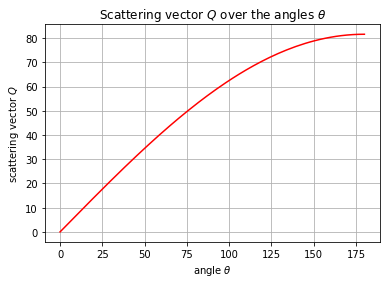

In [7]:
import matplotlib.pyplot as plt
plt.plot(theta, q, color="red")
plt.xlabel(r"angle $\theta$")
plt.ylabel(r"scattering vector $Q$")
plt.title(r"Scattering vector $Q$ over the angles $\theta$")
plt.grid();

## Small-angle scattering sphere

In small-angle scattering the form factor of a sphere is given by

$F(Q, r) = { 3 ~ sin(Qr) - Qr \cdot cos(Qr) \over (Qr)^3 }$

It describes the scattering amplitude of exact spherical scatterers of radius *r*.
The scattering intensity is the amplitude squared. Assuming the contrast is 1 (and thus the scattering length density difference), it can be simplified to:

$ I(Q, r) = F(Q, r)^2 $

1. Implement a function for calculating the intensity of spheres.
2. Use that function and the *Q*-vector from above to calculate the intensity of spheres of 25 nm radius and store it in a variable.

In [9]:
def sphere(q, r):
    qr = q*r
    return (3. * (numpy.sin(qr) - qr * numpy.cos(qr)) / (qr**3.))**2
ff = sphere(q, 25.)
ff

array([9.93683651e-01, 9.93524789e-01, 9.93361943e-01, 9.93195014e-01,
       9.93023900e-01, 9.92848496e-01, 9.92668695e-01, 9.92484389e-01,
       9.92295465e-01, 9.92101809e-01, ..., 6.67437251e-08,
       3.56181022e-08, 1.99652509e-07, 7.89607257e-08, 2.06972820e-08,
       1.69701846e-07, 6.82223433e-08, 2.18068122e-08, 1.49481784e-07,
       4.25884591e-08])

## Plot the sphere form factor

Plot the calculated sphere intensity over the scattering vector. Try different values for:
1. The number of *Q* values generated at the beginning, how does that change the plot?
2. The radius of the spheres, how does it affect the plotted curve?
*Hint: For playing with different radius values, it's easier to put the function call for the intensity in the plot command directly, instead of storing it in a variable first which is plotted then.*

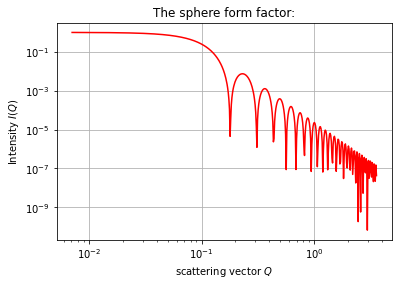

In [10]:
import matplotlib.pyplot as plt
plt.plot(q, sphere(q, 25.), color="red")
plt.xlabel("scattering vector $Q$")
plt.ylabel("Intensity $I(Q)$")
plt.title("The sphere form factor:")
plt.xscale('log'); plt.yscale('log');
plt.grid();